<h1>Hello! This is my first kernel in Data Science using python.I have followed a tutorial with link below 
to make this Whole Kernel.I hope thet you like this kernel

**So we would start analysing by importing all important libraries .**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'gender_submission.csv', 'test.csv']


In [2]:
#Importing python libraries
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
import os
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn import linear_model

In [3]:
pd.set_option('display.max_rows',2000)#So that we can see the whole dataset at one go

We are making dataframe test and train to analyse the given dataset.

In [4]:
# import train and test to play with it
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')

In [5]:
#get the type
type(train_df)

pandas.core.frame.DataFrame

**Basic Structure**

Going through the complete dataset to get the jist of it.

In [6]:

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test_df['Survived'] = -888 #Adding Survived with a default value

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Survived       418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [10]:
#test_df.head()
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_df = train_df[['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Survived']]

In [12]:

#Concatinating two data frames(train and test)
df = pd.concat((train_df,test_df),axis = 0)

df = df.reset_index()


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
index          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Survived       1309 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 133.0+ KB


In [14]:
df = df.drop(['index'],axis=1)

df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [15]:
df = df.set_index('PassengerId')
df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,-888
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,-888
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,-888
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,-888
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,-888


# <h1>Various pandas functions on data set<h1>

In [16]:
df.Name.head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [17]:
df.loc[5:10]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [18]:
#indexing : use iloc based indexing

In [19]:
df.iloc[5:10,3:8]

,Age,SibSp,Parch,Ticket,Fare
PassengerId,,,,,
6,NaN,0,0,330877,8.4583
7,54.0,0,0,17463,51.8625
8,2.0,3,1,349909,21.0750
9,27.0,0,2,347742,11.1333
10,14.0,1,0,237736,30.0708


In [20]:
#filter rows based on the condition
male_passengers = df.loc[df.Sex =='male',:]
print('Number of male passengers : {0}'.format(len(male_passengers)))


Number of male passengers : 843


In [21]:
#use & or | operators to build complex logic

In [22]:
male_passengers_first_class = df.loc[((df.Sex =='male') &(df.Pclass == 1)),:]

In [23]:
print('Number of passengers in first class:{0}'.format(len(male_passengers_first_class)))

Number of passengers in first class:179


So far we have use numpy and pandas to analyse the whole data and going through it.
Now we will Start exploring the whole Dataset.


<h1>Summaty Statistics<h1>


<h2>Centrality Measure<h2>

Various technique such as Mean and Median are used as Centrality measures
Mean may me good option often but it is quite affected by extreme value.In such cases we can use median for analysis.

<h2>Spread/Dispersion measure<h2>

we use range we can see how things are packed.But it is affected by extreme values.
So percentiles are used.These are specially used as quartiles


In [24]:
# use .describe() to get statistics for all numeric columns
df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479,-283.301757
std,0.837836,14.413493,1.041658,0.865560,51.758668,414.337413
min,1.000000,0.170000,0.000000,0.000000,0.000000,-888.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,-888.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [25]:
df.isnull().sum()

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
Survived       0
dtype: int64

In [26]:
#Numerical feature
#centrality measures

In [27]:
print('Mean Fare : {0}'.format(df.Fare.mean()))
print('Median Fare : {0}'.format(df.Fare.median()))


Mean Fare : 33.2954792813456
Median Fare : 14.4542


In [28]:
#dispersion measure
print('Max fare  : {0}'.format(df.Fare.max()))#max
print('Min fare  : {0}'.format(df.Fare.min()))#max
print('Fare range  : {0}'.format(df.Fare.max() - df.Fare.min()))#range
print('25 percentile  : {0}'.format(df.Fare.quantile(.25)))#25 percentile
print('50 percentile  : {0}'.format(df.Fare.quantile(.50)))#50 percentile
print('75 percentile  : {0}'.format(df.Fare.quantile(.75)))#75 percentile
print('Variance fare: {0}'.format(df.Fare.var()))#variance
print('Standard deviation  : {0}'.format(df.Fare.std()))#standard deviation




Max fare  : 512.3292
Min fare  : 0.0
Fare range  : 512.3292
25 percentile  : 7.8958
50 percentile  : 14.4542
75 percentile  : 31.275
Variance fare: 2678.959737892894
Standard deviation  : 51.75866823917414


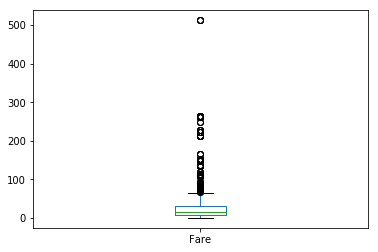

In [29]:
# box-whiskers plot
df.Fare.plot(kind='box')

<h1>Categorical features<h1>
<p>Also known as features with non integer values.(Boolean,Someone's Name or Gender)<p>

In [30]:
#use describe to get statistics for all columns including non-numeric ones
df.describe(include='all')

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
count,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,1309.000000
unique,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,NaN
top,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,NaN
freq,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,NaN
mean,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN,-283.301757
std,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN,414.337413
min,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,-888.000000
25%,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,-888.000000
50%,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000
75%,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,1.000000


In [31]:

df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [32]:
df.Sex.value_counts(normalize = True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [33]:
df[df.Survived != -888].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [34]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

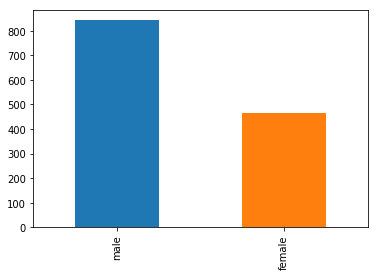

In [35]:
#Visualize Sex count,Survived and Class wise survival
df.Sex.value_counts().plot(kind='bar');

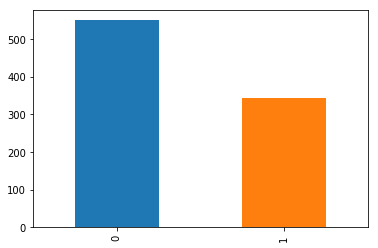

In [36]:
df[df.Survived != -888].Survived.value_counts().plot(kind='bar');

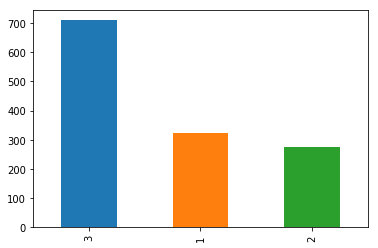

In [37]:
df.Pclass.value_counts().plot(kind='bar');

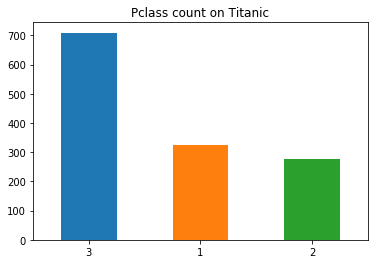

In [38]:


df.Pclass.value_counts().plot(kind='bar',rot = 0,title = "Pclass count on Titanic");

<h2>Distributions of univariate feature at a time<h1>

In [39]:
#for univariate distributions we use Histogram and KDE
#KDE stands for Kerenl Density Estimation

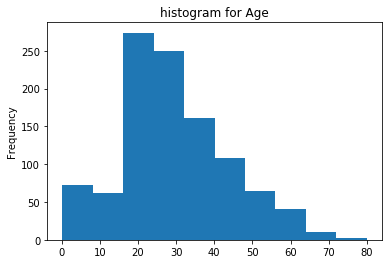

In [40]:
df.Age.plot(kind ='hist',title = 'histogram for Age' );

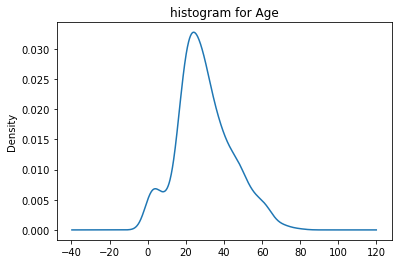

In [41]:
df.Age.plot(kind ='kde',title = 'histogram for Age' );

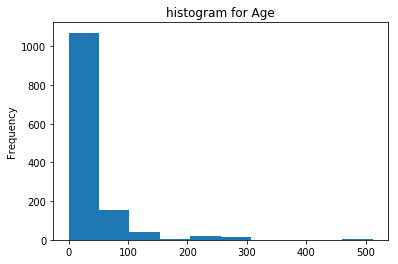

In [42]:
df.Fare.plot(kind ='hist',title = 'histogram for Age' );

<h2>Bivariate Distribution<h2>

In [43]:
#We use bivariate distribution for Scatter plot

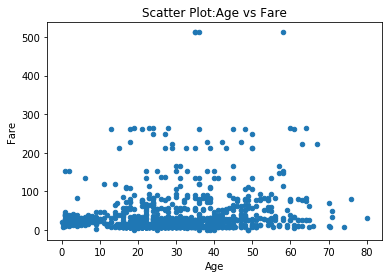

In [44]:
df.plot.scatter(x='Age',y='Fare',title='Scatter Plot:Age vs Fare');

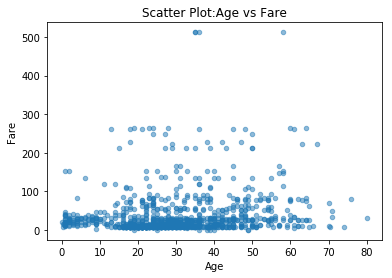

In [45]:
df.plot.scatter(x='Age',y='Fare',title='Scatter Plot:Age vs Fare',alpha = 0.5);

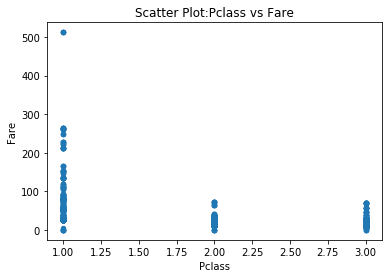

In [46]:
df.plot.scatter(x='Pclass',y='Fare',title='Scatter Plot:Pclass vs Fare');

<h2>Grouping<h2>

In [47]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [48]:
#group by
df.groupby('Pclass').Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [49]:



df.groupby('Pclass').Age.median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [50]:
df.groupby(['Pclass'])['Fare','Age'].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [51]:



df.groupby(['Pclass']).agg({'Fare':'mean','Age':'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [52]:
# more complicated aggregation
aggregations ={
    'Fare': {#work on fare column
        'mean_Fare':'mean',
        'median_Fare':'median',
        'Max_Fare':max,
        'Min_Fare' :np.min
    },
    'Age': {
        'mean_Age':'mean',
        'median_Age':'median',
        'Max_Age':max,
        'Min_Age' :np.min
    }
}

In [53]:
df.groupby(['Pclass']).agg(aggregations)

/opt/conda/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                         ...          Age                
        mean_Fare median_Fare  Max_Fare   ...   median_Age Max_Age Min_Age
Pclass                                    ...                             
1       87.508992     60.0000  512.3292   ...         39.0    80.0    0.92
2       21.179196     15.0458   73.5000   ...         29.0    70.0    0.67
3       13.302889      8.0500   69.5500   ...         24.0    74.0    0.17

[3 rows x 8 columns]

In [54]:
df.groupby(['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

<h2>Crosstab<h2>

In [55]:
pd.crosstab(df.Sex,df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


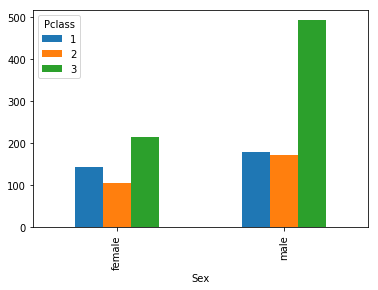

In [56]:
pd.crosstab(df.Sex,df.Pclass).plot(kind='bar');

<h2>Pivot Table<h2>

In [57]:
#pivot table
df.pivot_table(index='Sex',columns = 'Pclass',values = 'Age',aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264





Similar results can be found by group by table

In [58]:
df.groupby(['Sex','Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


<h1>**Data Munging**<h1>

**Step 1:Missing value addressing**

Feature : Embarked

In [59]:
df.isnull().sum()

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
Survived       0
dtype: int64

In [60]:
train_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Survived    1309 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [62]:
df[df.Embarked.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1
830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1


In [63]:
#how many people embarked at a particular points
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [64]:
#which embarked point has highest survival count
pd.crosstab(df[df.Survived != -888].Survived,df[df.Survived != -888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [65]:
# impute missing value with 'S'
#df.loc[df.Embarked.isnull(),'Embarked'] = S
#df.Embarked.fillna('S',inplace = True)

In [66]:
df.groupby(['Pclass','Embarked']).Fare.median() 

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

From above we get to know that the passenger who are in class 1 and paid fare of 80 has  more chances to be Embarked from C.

In [67]:

df.Embarked.fillna('C',inplace = True)

In [68]:
df.Embarked.isnull().sum()

0

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Survived    1309 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


Feature : Fare

In [70]:
df[df.Fare.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,-888


In [71]:
median_fare = df.loc[(df.Pclass == 3) & (df.Embarked=='S'),'Fare'].median()
print (median_fare)

8.05


In [72]:
df.Fare.fillna(median_fare,inplace=True)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Survived    1309 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


Feature : Age

In [74]:
df.Age.isnull().sum()

263

<h1>We have three options to fill missing age value<h1>
<h2> option 1 : replace all missing value with the mean value<h2>

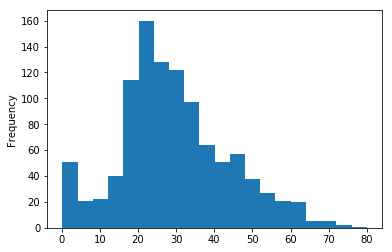

In [75]:
df.Age.plot(kind='hist',bins=20);

In [76]:
df.Age.mean()

29.881137667304014

Due to several 70's and 80's the mean is quite affected

<h2>option 2: Replace by median<h2>

In [77]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

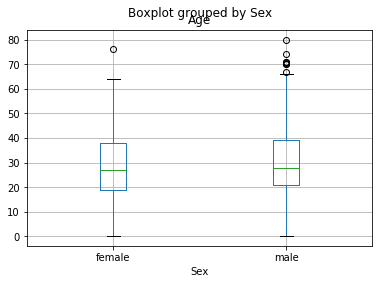

In [78]:
df[df.Age.notnull()].boxplot('Age','Sex');

<h2>option 3 : replace with median age of Pclass<h2>

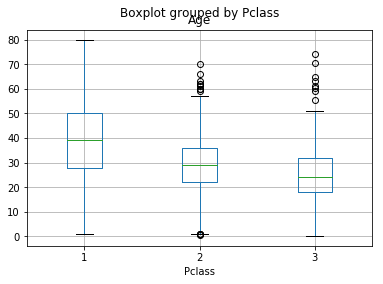

In [79]:
df[df.Age.notnull()].boxplot('Age','Pclass');

<h2>option 4 : replace with median age of title<h2>

We all know that the' Mr' is used for old veteran and 'master' is used for young man.Similar goes with females.So we will extract titles to predict the values of the age of the passenger of titanic. 

In [80]:
df.Name.head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [81]:
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [82]:
#use map function to apply the function on each Name value row i
df.Name.map(lambda x : GetTitle(x))

PassengerId
1                 mr
2                mrs
3               miss
4                mrs
5                 mr
6                 mr
7                 mr
8             master
9                mrs
10               mrs
11              miss
12              miss
13                mr
14                mr
15              miss
16               mrs
17            master
18                mr
19               mrs
20               mrs
21                mr
22                mr
23              miss
24                mr
25              miss
26               mrs
27                mr
28                mr
29              miss
30                mr
31               don
32               mrs
33              miss
34                mr
35                mr
36                mr
37                mr
38                mr
39              miss
40              miss
41               mrs
42               mrs
43                mr
44              miss
45              miss
46                mr
47                mr
4

In [83]:
df.Name.map(lambda x : GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [84]:
def GetTitle(name):
    title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [85]:
df['Title'] = df.Name.map(lambda x : GetTitle(x))

In [86]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
PassengerId,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr


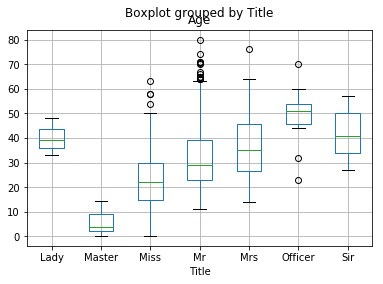

In [87]:
df[df.Age.notnull()].boxplot('Age','Title');

In [88]:
#replace missing values
title_age_median = df.groupby('Title').Age.transform('median')

In [89]:
df.Age.fillna(title_age_median,inplace = True)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1309 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Survived    1309 non-null int64
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 172.9+ KB


<h1>Outliers<h1>

Techniques to compensate for outliers
1. 1.Removal
1. 2.Transformation
1. 3.Binning
1. 4.Imputation

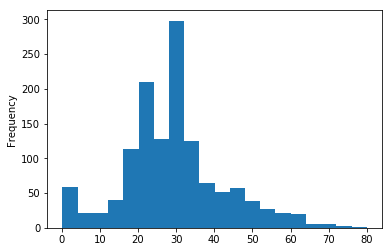

In [91]:
# use histograms to get to understand the distribution
df.Age.plot(kind = 'hist' , bins = 20);

In [92]:
df.loc[df.Age > 70]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
PassengerId,,,,,,,,,,,,
97,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0,Mr
117,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,0,Mr
494,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0,Mr
631,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,1,Mr
852,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,0,Mr
988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,-888,Mrs


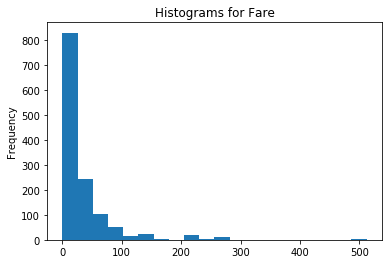

In [93]:
# hsitograms for fare
df.Fare.plot(kind='hist',bins = 20, title = 'Histograms for Fare')

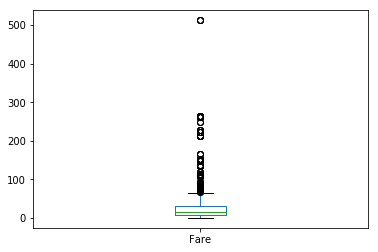

In [94]:
df.Fare.plot(kind='box');

In [95]:
# look for the outliers
df.loc[df.Fare == df.Fare.max()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
PassengerId,,,,,,,,,,,,
259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1,Miss
680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1,Mr
738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1,Mr
1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,-888,Mrs


In [96]:
#try to use transformation to reduce the skewness

In [97]:
LogFare = np.log(df.Fare +1)#adding 1 to accomalate 

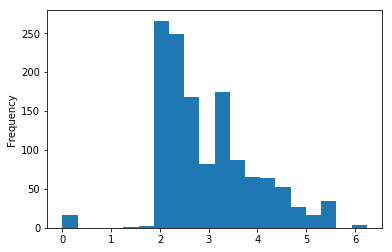

In [98]:
LogFare.plot(kind='hist',bins = 20);

In [99]:
#binning

In [100]:
pd.qcut(df.Fare,4)

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
6         (7.896, 14.454]
7       (31.275, 512.329]
8        (14.454, 31.275]
9         (7.896, 14.454]
10       (14.454, 31.275]
11       (14.454, 31.275]
12       (14.454, 31.275]
13        (7.896, 14.454]
14       (14.454, 31.275]
15        (-0.001, 7.896]
16       (14.454, 31.275]
17       (14.454, 31.275]
18        (7.896, 14.454]
19       (14.454, 31.275]
20        (-0.001, 7.896]
21       (14.454, 31.275]
22        (7.896, 14.454]
23        (7.896, 14.454]
24      (31.275, 512.329]
25       (14.454, 31.275]
26      (31.275, 512.329]
27        (-0.001, 7.896]
28      (31.275, 512.329]
29        (-0.001, 7.896]
30        (-0.001, 7.896]
31       (14.454, 31.275]
32      (31.275, 512.329]
33        (-0.001, 7.896]
34        (7.896, 14.454]
35      (31.275, 512.329]
36      (31.275, 512.329]
37        (-0.001, 7.896]
38        (7.896, 14.454]


In [101]:
pd.qcut(df.Fare,4,labels=['very_low','low','high','very_high'])

PassengerId
1        very_low
2       very_high
3             low
4       very_high
5             low
6             low
7       very_high
8            high
9             low
10           high
11           high
12           high
13            low
14           high
15       very_low
16           high
17           high
18            low
19           high
20       very_low
21           high
22            low
23            low
24      very_high
25           high
26      very_high
27       very_low
28      very_high
29       very_low
30       very_low
31           high
32      very_high
33       very_low
34            low
35      very_high
36      very_high
37       very_low
38            low
39           high
40            low
41            low
42           high
43       very_low
44      very_high
45       very_low
46            low
47           high
48       very_low
49           high
50           high
51      very_high
52       very_low
53      very_high
54           high
55      very_hig

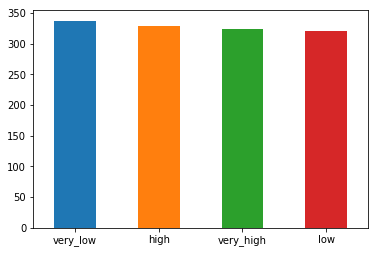

In [102]:
pd.qcut(df.Fare,4,labels = ['very_low','low','high','very_high']).value_counts().plot(kind='bar',rot = 0);

In [103]:
# create fare bin feature
df['Fare_Bin']=pd.qcut(df.Fare,4,labels=['very_low','low','high','very_high'])

<h1>**Feature Engineering** <h1>

**Feature : Age State(Adult or Child) **

In [104]:
#Age State based on Age
df['AgeState'] = np.where(df['Age']>=18,'Adult','Child')

In [105]:
#AgeState Counts
df['AgeState'].value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [106]:
pd.crosstab(df[df.Survived != -888].Survived , df[df.Survived != -888].AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


**Feature : FamilySize**

In [107]:
df['FamilySize'] = df.Parch + df.SibSp + 1 # i for Self

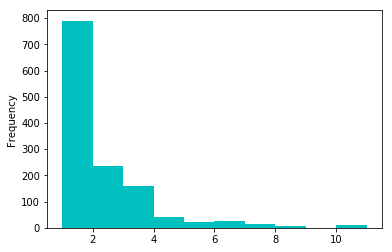

In [108]:
#explore the family feature
df['FamilySize'].plot(kind = 'hist',color = 'c');

In [109]:
#further exploring familoy size with mjax family size
df.loc[df.FamilySize == df.FamilySize.max(),['Name','Survived','FamilySize','Ticket']]

,Name,Survived,FamilySize,Ticket
PassengerId,,,,
160,"Sage, Master. Thomas Henry",0,11,CA. 2343
181,"Sage, Miss. Constance Gladys",0,11,CA. 2343
202,"Sage, Mr. Frederick",0,11,CA. 2343
325,"Sage, Mr. George John Jr",0,11,CA. 2343
793,"Sage, Miss. Stella Anna",0,11,CA. 2343
847,"Sage, Mr. Douglas Bullen",0,11,CA. 2343
864,"Sage, Miss. Dorothy Edith ""Dolly""",0,11,CA. 2343
1080,"Sage, Miss. Ada",-888,11,CA. 2343
1234,"Sage, Mr. John George",-888,11,CA. 2343


In [110]:
pd.crosstab(df[df.Survived != -888].Survived , df[df.Survived != -888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


**Feature :isMother**

In [111]:
# a lady aged 18 or more who has Parch >0 and is married 
df['IsMother'] = np.where(((df.Sex == 'female') & (df.Parch > 0) & (df.Age>18) & (df.Title != 'Miss')),1,0)

In [112]:
#Crosstab with mother
pd.crosstab(df[df['Survived'] != -888].Survived,df[df['Survived'] != -888].IsMother )

IsMother,0,1
Survived,,
0,533,16
1,303,39


**Feature:Deck**

In [113]:
#explore Cabin values
df.Cabin

PassengerId
1                   NaN
2                   C85
3                   NaN
4                  C123
5                   NaN
6                   NaN
7                   E46
8                   NaN
9                   NaN
10                  NaN
11                   G6
12                 C103
13                  NaN
14                  NaN
15                  NaN
16                  NaN
17                  NaN
18                  NaN
19                  NaN
20                  NaN
21                  NaN
22                  D56
23                  NaN
24                   A6
25                  NaN
26                  NaN
27                  NaN
28          C23 C25 C27
29                  NaN
30                  NaN
31                  NaN
32                  B78
33                  NaN
34                  NaN
35                  NaN
36                  NaN
37                  NaN
38                  NaN
39                  NaN
40                  NaN
41                  NaN
42  

In [114]:
#Getting unique cabin
df.Cabin.value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F2                 4
D                  4
F33                4
C22 C26            4
B96 B98            4
F4                 4
C78                4
C101               3
B58 B60            3
B51 B53 B55        3
E34                3
E101               3
A34                3
B77                2
C124               2
C125               2
C32                2
B28                2
D17                2
C106               2
B41                2
D33                2
D37                2
B22                2
B18                2
E121               2
D35                2
C80                2
B78                2
D36                2
C62 C64            2
C65                2
C85                2
C31                2
C46                2
E25                2
C123               2
B45                2
C89                2
C116               2
E24                2
D15                2
B20                2
D21                2
D20          

In [115]:
#We see that T is odd one out in above observation so we can asume it is mistaken value

In [116]:
# get the value to Nan
df.loc[df.Cabin == 'T','Cabin']=np.NaN

In [117]:
def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')


In [118]:
df['Deck'] = df['Cabin'].map(lambda x: get_deck(x))

In [119]:
# check counts
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [120]:
pd.crosstab(df[df.Survived != -888].Survived,df[df.Survived != -888].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
Pclass        1309 non-null int64
Name          1309 non-null object
Sex           1309 non-null object
Age           1309 non-null float64
SibSp         1309 non-null int64
Parch         1309 non-null int64
Ticket        1309 non-null object
Fare          1309 non-null float64
Cabin         294 non-null object
Embarked      1309 non-null object
Survived      1309 non-null int64
Title         1309 non-null object
Fare_Bin      1309 non-null category
AgeState      1309 non-null object
FamilySize    1309 non-null int64
IsMother      1309 non-null int64
Deck          1309 non-null object
dtypes: category(1), float64(2), int64(6), object(8)
memory usage: 215.3+ KB


 <h1>Categorical feature<h1>
 
 

In [122]:
#sex
df['IsMale'] = np.where(df.Sex == 'male',1,0)

In [123]:
#columns deck,pclass,title,Agestate
df = pd.get_dummies(df,columns=['Deck','Pclass','Title','Fare_Bin','Embarked','AgeState'])

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 39 columns):
Name                  1309 non-null object
Sex                   1309 non-null object
Age                   1309 non-null float64
SibSp                 1309 non-null int64
Parch                 1309 non-null int64
Ticket                1309 non-null object
Fare                  1309 non-null float64
Cabin                 294 non-null object
Survived              1309 non-null int64
FamilySize            1309 non-null int64
IsMother              1309 non-null int64
IsMale                1309 non-null int64
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pcla

<h1>**Drop and Reorder Columns**<h1>

In [125]:
#drop columns

In [126]:
df.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'],axis = 1,inplace = True)

In [127]:
#reorder columns
columns = [column for column in df.columns if column != 'Survived']
columns = ['Survived']+columns
df = df[columns]

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
Survived              1309 non-null int64
Age                   1309 non-null float64
Fare                  1309 non-null float64
FamilySize            1309 non-null int64
IsMother              1309 non-null int64
IsMale                1309 non-null int64
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Title_Lady            1309 non-null uint8
Title_Master          1309 non-null uint8
Title_Miss            1309 non-null uint8
Title_Mr              1309 non-null uint8
Title_M

In [129]:
df.to_csv('out.csv')#Saving Dataset before making predicting model
#This would be saved as output in Version folder.

In [131]:
train_df = df.loc[0:891,:]

In [132]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 33 columns):
Survived              891 non-null int64
Age                   891 non-null float64
Fare                  891 non-null float64
FamilySize            891 non-null int64
IsMother              891 non-null int64
IsMale                891 non-null int64
Deck_A                891 non-null uint8
Deck_B                891 non-null uint8
Deck_C                891 non-null uint8
Deck_D                891 non-null uint8
Deck_E                891 non-null uint8
Deck_F                891 non-null uint8
Deck_G                891 non-null uint8
Deck_Z                891 non-null uint8
Pclass_1              891 non-null uint8
Pclass_2              891 non-null uint8
Pclass_3              891 non-null uint8
Title_Lady            891 non-null uint8
Title_Master          891 non-null uint8
Title_Miss            891 non-null uint8
Title_Mr              891 non-null uint8
Title_Mrs             891 non-

In [133]:
train_df.tail()

,Survived,Age,Fare,FamilySize,IsMother,IsMale,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Z,Pclass_1,Pclass_2,Pclass_3,Title_Lady,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Sir,Fare_Bin_very_low,Fare_Bin_low,Fare_Bin_high,Fare_Bin_very_high,Embarked_C,Embarked_Q,Embarked_S,AgeState_Adult,AgeState_Child
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
887,0,27.0,13.00,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0
888,1,19.0,30.00,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0
889,0,22.0,23.45,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0
890,1,26.0,30.00,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
891,0,32.0,7.75,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0


In [134]:
test_df = df.loc[892:,:]

In [135]:
test_df.tail()

,Survived,Age,Fare,FamilySize,IsMother,IsMale,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Z,Pclass_1,Pclass_2,Pclass_3,Title_Lady,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Sir,Fare_Bin_very_low,Fare_Bin_low,Fare_Bin_high,Fare_Bin_very_high,Embarked_C,Embarked_Q,Embarked_S,AgeState_Adult,AgeState_Child
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1305,-888,29.0,8.0500,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0
1306,-888,39.0,108.9000,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
1307,-888,38.5,7.2500,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0
1308,-888,29.0,8.0500,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0
1309,-888,4.0,22.3583,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1


<h1>Building Machine Learning Models<h1>

Now we will train several Machine Learning models and compare their results. Note that because the dataset does not provide labels for their testing-set, we need to use the predictions on the training set to compare the algorithms with each other. 

In [136]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("Survived", axis=1).copy()

In [137]:
X_train.head()

,Age,Fare,FamilySize,IsMother,IsMale,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Z,Pclass_1,Pclass_2,Pclass_3,Title_Lady,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Sir,Fare_Bin_very_low,Fare_Bin_low,Fare_Bin_high,Fare_Bin_very_high,Embarked_C,Embarked_Q,Embarked_S,AgeState_Adult,AgeState_Child
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22.0,7.2500,2,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0
2,38.0,71.2833,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0
3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0
4,35.0,53.1000,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
5,35.0,8.0500,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0


In [138]:
Y_train.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

Stochastic Gradient Descent (SGD):

In [139]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2);

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Random Forest:

In [140]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

Logistic Regression

In [141]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


K Nearest Neighbor:

In [142]:
from sklearn.neighbors import KNeighborsClassifier

In [143]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

Gaussian Naive Bayes:

In [144]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

Perceptron:

In [145]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Linear Support Vector Machine:

In [146]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Decision Tree

from sklearn import tree

In [147]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [148]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
98.32,Random Forest
98.32,Decision Tree
84.96,KNN
83.84,Logistic Regression
77.10,Naive Bayes
70.93,Perceptron
69.92,Stochastic Gradient Decent
67.23,Support Vector Machines


In [149]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [152]:
df_result = pd.DataFrame(Y_prediction)


In [153]:
test_df.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [165]:
df_result.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,1
896,1


In [155]:
Index=pd.DataFrame(test_df.index)

In [156]:
df_result['PassengerId']=Index

In [157]:
df_result

,0,PassengerId
0,0,892
1,0,893
2,0,894
3,1,895
4,1,896
5,0,897
6,0,898
7,0,899
8,1,900
9,0,901


In [159]:
columns = [column for column in df_result.columns if column != 'PassengerId']
columns = ['PassengerId']+columns
df_result = df_result[columns]


In [160]:
df_result.to_csv('out1.csv')

In [161]:
df_result = df_result.set_index('PassengerId')

In [162]:
df_result.columns = ['Survived']

In [163]:
df_result

,Survived
PassengerId,
892,0
893,0
894,0
895,1
896,1
897,0
898,0
899,0
900,1


In [164]:
df_result.to_csv('out3.csv')
